In [1]:
import numpy as np
import os
import shutil
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation

from matplotlib import pyplot as plt

from numpy.random import seed
import tensorflow as tf
from keras import backend as k
import os

Using TensorFlow backend.


## Obteniendo las imagenes

In [2]:
!wget https://github.com/vincent1bt/tesla-cars-dataset/archive/master.zip

--2018-11-02 00:18:15--  https://github.com/vincent1bt/tesla-cars-dataset/archive/master.zip
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vincent1bt/tesla-cars-dataset/zip/master [following]
--2018-11-02 00:18:16--  https://codeload.github.com/vincent1bt/tesla-cars-dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121, 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ] 188.48M  22.5MB/s    in 8.8s    

2018-11-02 00:18:25 (21.4 MB/s) - ‘master.zip’ saved [197632877]



In [0]:
!unzip -qq master.zip

In [0]:
!mkdir -p validation_images/tesla_model_3 && mkdir validation_images/tesla_model_s && mkdir validation_images/tesla_model_x

In [0]:
validation_set_size = 30

In [0]:
def move_images(from_path, to_path):
  files = os.listdir(from_path)
  folder_size = len(files)
  first_index = folder_size - validation_set_size
  files_to_move = files[first_index:]
  
  for file_name in files_to_move:
    source_file_name = from_path + file_name
    destination_file_name = to_path + file_name
    shutil.move(source_file_name, destination_file_name)

In [0]:
move_images("./tesla-cars-dataset-master/tesla-model-3/", "./validation_images/tesla_model_3/")
move_images("./tesla-cars-dataset-master/tesla-model-s/", "./validation_images/tesla_model_s/")
move_images("./tesla-cars-dataset-master/tesla-model-x/", "./validation_images/tesla_model_x/")

In [0]:
!mv tesla-cars-dataset-master training_images

In [0]:
!mv training_images/tesla-model-3 training_images/tesla_model_3
!mv training_images/tesla-model-s training_images/tesla_model_s
!mv training_images/tesla-model-x training_images/tesla_model_x

In [10]:
!ls training_images

tesla_model_3  tesla_model_s  tesla_model_x


In [11]:
!ls

master.zip  sample_data  training_images  validation_images


## Preprocesar las imagenes

In [0]:
img_height = 64
img_width = 64

def load_images(paths):
  X = []
  y = []
  
  for path in paths:
    images_paths = os.listdir(path)
    
    for image_path in images_paths:
      complete_path = path + image_path
      image = load_img(complete_path, target_size=(img_height, img_width))
      image_array = img_to_array(image)
      X.append(image_array)
      label = paths.index(path)
      y.append(label)
  
  return X, y

In [0]:
training_paths = ["training_images/tesla_model_3/", "training_images/tesla_model_s/", "training_images/tesla_model_x/"]
validation_paths = ["validation_images/tesla_model_3/", "validation_images/tesla_model_s/", "validation_images/tesla_model_x/"]

In [14]:
X_train, y_train = load_images(training_paths)
X_val, y_val = load_images(validation_paths)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
X_train = np.array(X_train)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [16]:
X_train.shape, X_val.shape

((356, 64, 64, 3), (90, 64, 64, 3))

In [17]:
y_train.shape, y_val.shape

((356,), (90,))

In [0]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [19]:
y_train.shape, y_val.shape

((356, 3), (90, 3))

In [0]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [0]:
second_shape = 64 * 64 * 3

In [0]:
X_train = X_train.reshape(X_train.shape[0], second_shape)
X_val = X_val.reshape(X_val.shape[0], second_shape)

In [23]:
X_train.shape, X_val.shape

((356, 12288), (90, 12288))

In [0]:
model = Sequential()
model.add(Dense(units=64, input_shape=(12288,)))
model.add(Activation('relu'))
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dense(units=3, activation="softmax"))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                786496    
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 788,675
Trainable params: 788,675
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
epochs = 10
batch_size = 32

In [37]:
model_train = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Train on 356 samples, validate on 90 samples
Epoch 1/10
356/356 [==============================] - 0s 312us/step - loss: 0.7978 - acc: 0.6545 - val_loss: 1.1649 - val_acc: 0.3667
Epoch 2/10
356/356 [==============================] - 0s 278us/step - loss: 0.8469 - acc: 0.6011 - val_loss: 1.3855 - val_acc: 0.4222
Epoch 3/10
356/356 [==============================] - 0s 274us/step - loss: 0.9369 - acc: 0.5787 - val_loss: 1.4823 - val_acc: 0.3556
Epoch 4/10
356/356 [==============================] - 0s 256us/step - loss: 0.9227 - acc: 0.5843 - val_loss: 1.2405 - val_acc: 0.3889
Epoch 5/10
356/356 [==============================] - 0s 282us/step - loss: 0.9933 - acc: 0.5478 - val_loss: 1.3135 - val_acc: 0.4444
Epoch 6/10
356/356 [==============================] - 0s 279us/step - loss: 0.9345 - acc: 0.5955 - val_loss: 1.5068 - val_acc: 0.4000
Epoch 7/10
356/356 [==============================] - 0s 266us/step - loss: 0.9140 - acc: 0.5787 - val_loss: 1.1604 - val_acc: 0.4778
Epoch 8/10
356/35

In [53]:
np.arange(epochs, step=1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [0]:
def plot_loss_and_accuracy(model_train):
  accuracy = model_train.history['acc']
  val_accuracy = model_train.history['val_acc']
  loss = model_train.history['loss']
  val_loss = model_train.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'b', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
  plt.ylim(ymin=0)
  plt.ylim(ymax=1)
  plt.xlabel('Epochs ', fontsize=16)
  plt.ylabel('Accuracity', fontsize=16)
  plt.title('Training and validation accuracy', fontsize = 20)
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epochs ', fontsize=16)
  plt.ylabel('Loss', fontsize=16)
  plt.title('Training and validation loss', fontsize= 20)
  plt.legend()
  plt.show()

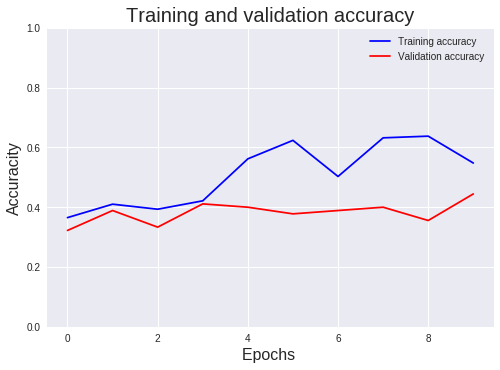

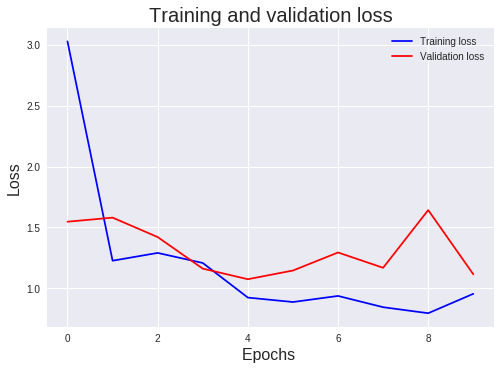

In [30]:
plot_loss_and_accuracy(model_train)

In [38]:
validation_acc = model_train.history['val_acc'][-1] * 100
training_acc = model_train.history['acc'][-1] * 100
print("Validation accuracy: {}%\nTraining Accuracy: {}%".format(validation_acc, training_acc))

Validation accuracy: 41.11111111111111%
Training Accuracy: 82.30337078651685%


## Segundo modelo

In [0]:
from keras import regularizers

In [0]:
second_model = Sequential()
second_model.add(Dense(units=16, input_shape=(12288,)))
second_model.add(Activation('relu'))
second_model.add(Dense(units=32))
second_model.add(Activation('relu'))
second_model.add(Dense(units=64))
second_model.add(Activation('relu'))
second_model.add(Dense(units=3, activation="softmax"))

In [0]:
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
epochs = 10
batch_size = 32

In [234]:
second_model_train = second_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Train on 356 samples, validate on 90 samples
Epoch 1/10
356/356 [==============================] - 2s 4ms/step - loss: 1.4237 - acc: 0.3792 - val_loss: 1.1118 - val_acc: 0.4111
Epoch 2/10
356/356 [==============================] - 0s 263us/step - loss: 1.1014 - acc: 0.3343 - val_loss: 1.1263 - val_acc: 0.3556
Epoch 3/10
356/356 [==============================] - 0s 263us/step - loss: 1.1044 - acc: 0.3624 - val_loss: 1.1032 - val_acc: 0.3667
Epoch 4/10
356/356 [==============================] - 0s 259us/step - loss: 1.0761 - acc: 0.4073 - val_loss: 1.1082 - val_acc: 0.3111
Epoch 5/10
356/356 [==============================] - 0s 267us/step - loss: 1.0311 - acc: 0.4803 - val_loss: 1.0865 - val_acc: 0.4333
Epoch 6/10
356/356 [==============================] - 0s 287us/step - loss: 0.9946 - acc: 0.5225 - val_loss: 1.0990 - val_acc: 0.3889
Epoch 7/10
356/356 [==============================] - 0s 292us/step - loss: 0.9904 - acc: 0.5056 - val_loss: 1.0881 - val_acc: 0.3778
Epoch 8/10
356/356 

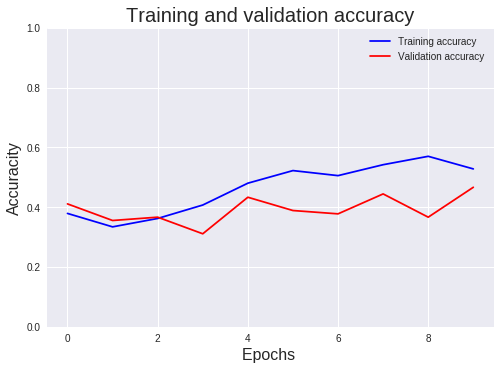

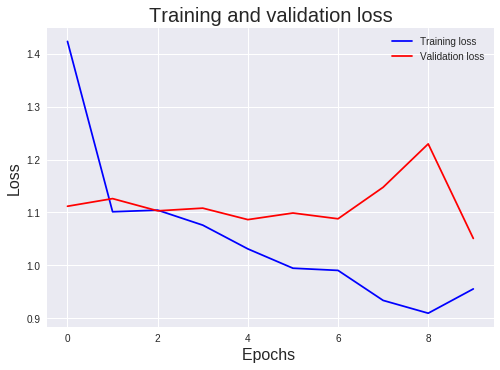

In [235]:
plot_loss_and_accuracy(second_model_train)

In [236]:
validation_acc = second_model_train.history['val_acc'][-1] * 100
training_acc = second_model_train.history['acc'][-1] * 100
print("Validation accuracy: {}%\nTraining Accuracy: {}%".format(validation_acc, training_acc))

Validation accuracy: 46.66666673289405%
Training Accuracy: 52.80898876404494%


In [0]:
second_model.save('tesla_model_46_52.h5')

## Cargar imagenes externas 

In [177]:
! wget https://static.urbantecno.com/2018/08/Tesla-Model-3-4-720x550.jpg

--2018-11-02 01:46:08--  https://static.urbantecno.com/2018/08/Tesla-Model-3-4-720x550.jpg
Resolving static.urbantecno.com (static.urbantecno.com)... 198.50.181.89
Connecting to static.urbantecno.com (static.urbantecno.com)|198.50.181.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65769 (64K) [image/jpeg]
Saving to: ‘Tesla-Model-3-4-720x550.jpg’

Tesla-Model-3-4-720 100%[===================>]  64.23K  --.-KB/s    in 0.08s   

2018-11-02 01:46:09 (854 KB/s) - ‘Tesla-Model-3-4-720x550.jpg’ saved [65769/65769]



In [178]:
! wget https://www.autonavigator.hu/wp-content/uploads/2014/01/109102_source-2.jpg

--2018-11-02 01:46:39--  https://www.autonavigator.hu/wp-content/uploads/2014/01/109102_source-2.jpg
Resolving www.autonavigator.hu (www.autonavigator.hu)... 194.33.69.21
Connecting to www.autonavigator.hu (www.autonavigator.hu)|194.33.69.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1028573 (1004K) [image/jpeg]
Saving to: ‘109102_source-2.jpg’

109102_source-2.jpg 100%[===================>]   1004K  1.20MB/s    in 0.8s    

2018-11-02 01:46:41 (1.20 MB/s) - ‘109102_source-2.jpg’ saved [1028573/1028573]



In [179]:
! wget https://upload.wikimedia.org/wikipedia/commons/9/92/2017_Tesla_Model_X_100D_Front.jpg

--2018-11-02 01:46:48--  https://upload.wikimedia.org/wikipedia/commons/9/92/2017_Tesla_Model_X_100D_Front.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4768386 (4.5M) [image/jpeg]
Saving to: ‘2017_Tesla_Model_X_100D_Front.jpg’

2017_Tesla_Model_X_ 100%[===================>]   4.55M  19.3MB/s    in 0.2s    

2018-11-02 01:46:49 (19.3 MB/s) - ‘2017_Tesla_Model_X_100D_Front.jpg’ saved [4768386/4768386]



In [180]:
!ls

109102_source-2.jpg		   Tesla-Model-3-4-720x550.jpg
2017_Tesla_Model_X_100D_Front.jpg  tesla_model_46_56.h5
master.zip			   training_images
sample_data			   validation_images


In [0]:
X = []

image = load_img("./Tesla-Model-3-4-720x550.jpg", target_size=(img_height, img_width))
image_array = img_to_array(image)
X.append(image_array)

image = load_img("./109102_source-2.jpg", target_size=(img_height, img_width))
image_array = img_to_array(image)
X.append(image_array)

image = load_img("./2017_Tesla_Model_X_100D_Front.jpg", target_size=(img_height, img_width))
image_array = img_to_array(image)
X.append(image_array)

X_test = np.array(X)

In [185]:
X_test.shape

(3, 64, 64, 3)

In [0]:
X_test = X_test.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], second_shape)

In [238]:
X_test.shape

(3, 12288)

In [0]:
y_true = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [243]:
y_pred = second_model.predict(X_test, batch_size=None, verbose=1, steps=None)

3/3 [==============================] - 0s 3ms/step


In [244]:
y_pred

array([[0.22741655, 0.4156091 , 0.35697436],
       [0.583717  , 0.3267301 , 0.08955295],
       [0.35106906, 0.5099873 , 0.13894367]], dtype=float32)

In [242]:
np.argmax(y_true, axis=1)

array([0, 1, 2])

In [245]:
np.argmax(y_pred, axis=1)

array([1, 0, 1])